In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [8]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [9]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [10]:
df.isnull().sum()


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [12]:
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [14]:
df = df.drop(['ID'],axis =1)

In [15]:
mark_array = df.values
mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)

# Model Kurma

In [16]:
kproto = KPrototypes(n_clusters = 10, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])

print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 720, ncost: 164.03639873697713
Run: 1, iteration: 2/20, moves: 61, ncost: 163.8884171638477
Run: 1, iteration: 3/20, moves: 9, ncost: 163.8743501809091
Run: 1, iteration: 4/20, moves: 5, ncost: 163.87131638852864
Run: 1, iteration: 5/20, moves: 0, ncost: 163.87131638852864
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1009, ncost: 176.0578519724213
Run: 2, iteration: 2/20, moves: 185, ncost: 173.51471428532528
Run: 2, iteration: 3/20, moves: 127, ncost: 172.31762675979508
Run: 2, iteration: 4/20, moves: 45, ncost: 172.05537055787633
Run: 2, iteration: 5/20, moves: 22, ncost: 171.9417793660481
Run: 2, iteration: 6/20, moves: 18, ncost: 171.87777617711419
Run: 2, iteration: 7/20, moves: 5, ncost: 171.8715670730825
Run: 2, iteration: 8/20,

10

In [17]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)
df['cluster'] = cluster_dict

df[['ID','Age','Income']] = df_temp

In [18]:
df[df['cluster'] == 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
36,0,0,31,0,143385,1,2,0,100000037
39,0,0,24,0,92542,1,1,0,100000040
40,0,0,30,0,163329,2,1,0,100000041
52,0,0,25,0,92058,1,2,0,100000053
53,0,0,31,0,117158,1,0,0,100000054
63,0,0,25,0,227385,1,2,0,100000064


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


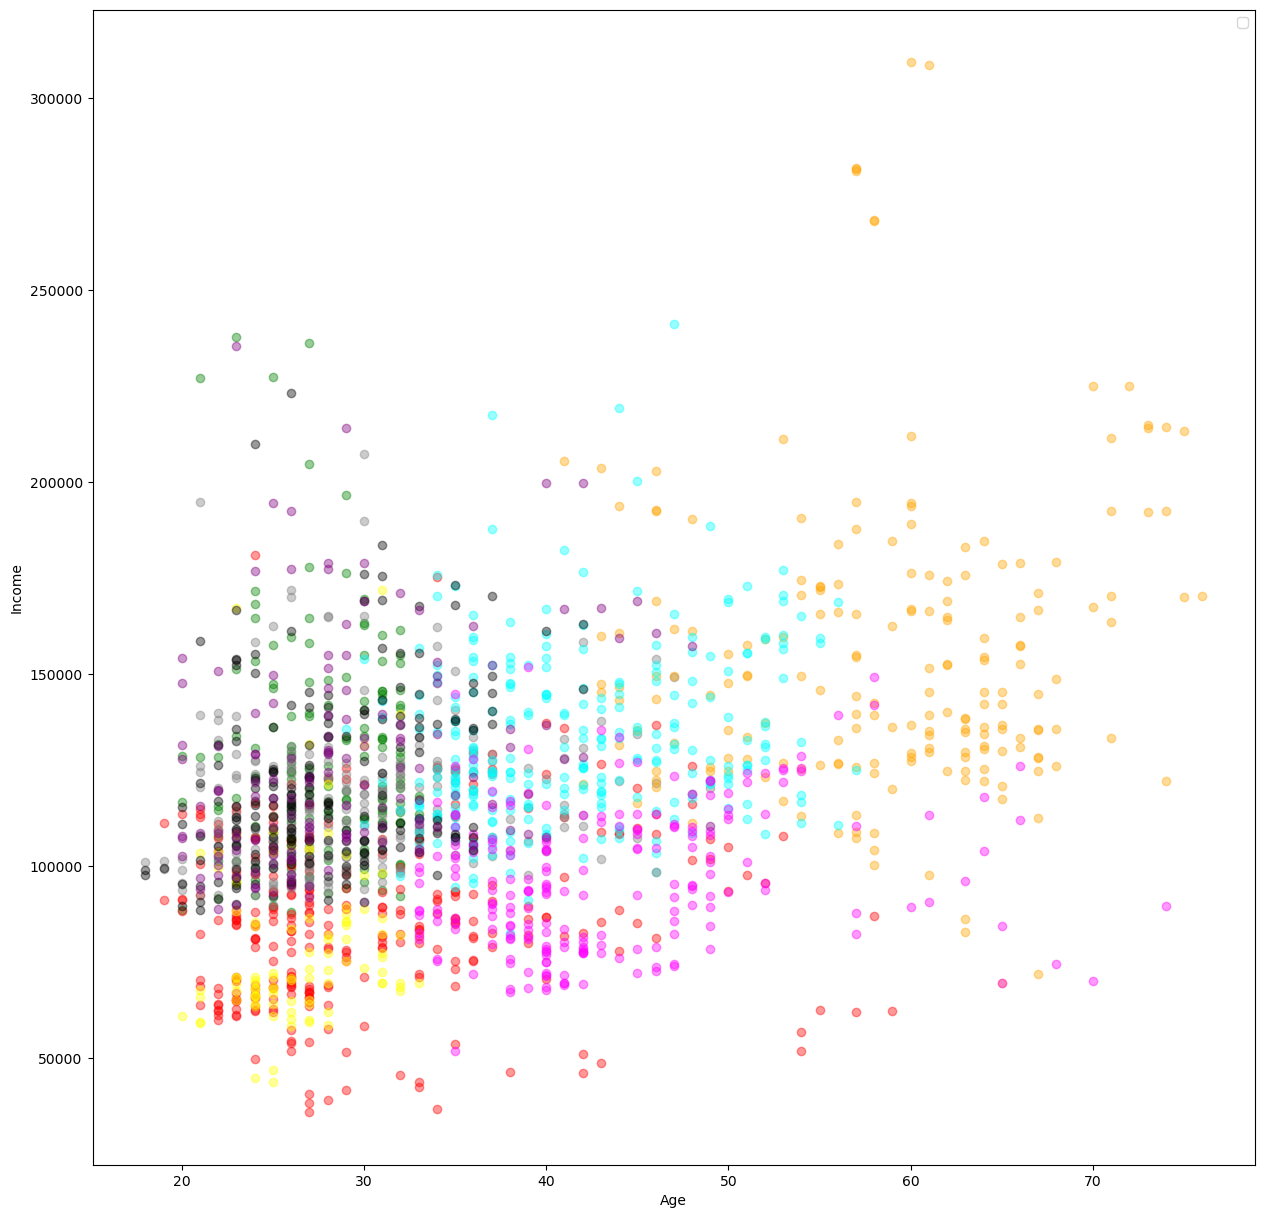

In [22]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 6]
df7 = df[df.cluster == 7]
df8 = df[df.cluster == 8]
df9 = df[df.cluster == 9]
df10 = df[df.cluster == 10]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='black', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

plt.legend()
plt.show()